In [1]:
import random
import math
import matplotlib.pyplot as plt


In [2]:
def dist(a, b):
    return math.hypot(a[0] - b[0], a[1] - b[1])

def route_len(path):
    return sum(dist(path[i], path[i+1]) for i in range(len(path)-1)) + dist(path[-1], path[0])


In [3]:
def new_path(points):
    p = points[:]
    random.shuffle(p)
    return p

def crossover(p1, p2):
    a, b = sorted(random.sample(range(len(p1)), 2))
    part = p1[a:b]
    rem = [x for x in p2 if x not in part]
    return part + rem

def mutate(path, rate):
    for i in range(len(path)):
        if random.random() < rate:
            j = random.randint(0, len(path)-1)
            path[i], path[j] = path[j], path[i]


In [4]:
def genetic(points, size=100, steps=500, rate=0.02):
    group = [new_path(points) for _ in range(size)]
    best = group[0]
    best_score = route_len(best)

    for _ in range(steps):
        scored = sorted(group, key=route_len)
        if route_len(scored[0]) < best_score:
            best = scored[0]
            best_score = route_len(best)
        next_gen = []
        for _ in range(size):
            p1, p2 = random.sample(scored[:20], 2)
            child = crossover(p1, p2)
            mutate(child, rate)
            next_gen.append(child)
        group = next_gen

    return best, best_score


In [5]:
cities = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(10)]
best_route, best_distance = genetic(cities)
print("Best distance:", best_distance)


Best distance: 281.63727382521853


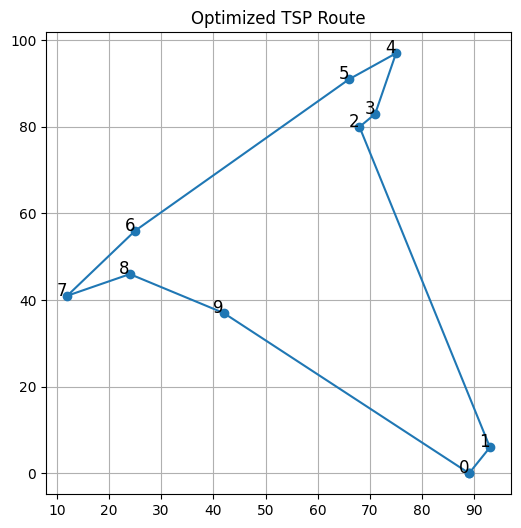

In [6]:
def draw(route):
    xs, ys = zip(*route + [route[0]])
    plt.figure(figsize=(6, 6))
    plt.plot(xs, ys, marker='o')
    for i, (x, y) in enumerate(route):
        plt.text(x, y, str(i), fontsize=12, ha='right')
    plt.title("Optimized TSP Route")
    plt.grid(True)
    plt.show()

draw(best_route)
